## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [4]:
keras.__version__

'3.6.0'

## Import Dataset

In [5]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [6]:
dataset.shape

(10000, 14)

In [7]:
dataset.head().T

,0,1,2,3,4
RowNumber,1,2,3,4,5
CustomerId,15634602,15647311,15619304,15701354,15737888
Surname,Hargrave,Hill,Onio,Boni,Mitchell
CreditScore,619,608,502,699,850
Geography,France,Spain,France,France,Spain
Gender,Female,Female,Female,Female,Female
Age,42,41,42,39,43
Tenure,2,1,8,1,2
Balance,0.0,83807.86,159660.8,0.0,125510.82
NumOfProducts,1,1,3,2,1


## Creating independent and dependent variables dataset (X, y)

In [8]:
# dataset.iloc[:, 3:13] ==> All rows and columns from index 3 to index 12
# dataset.iloc[:, 13] ==> All rows and columns indexed as 13

In [9]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [10]:
X.shape

(10000, 10)

In [11]:
y.shape

(10000,)

In [12]:
# X.head()
X[0:5]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [13]:
# y.head()
y[0:5]

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

## Create dummy variables of columns `Gender` and `Geography` (X)

In [14]:
gender = pd.get_dummies(X['Gender'], drop_first=True)
geography = pd.get_dummies(X["Geography"], drop_first=True)

In [15]:
print(type(gender))
print(type(geography))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [16]:
gender.head()

,Male
0,False
1,False
2,False
3,False
4,False


In [17]:
geography.head()

,Germany,Spain
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True


## Concatenate dummy variables (`geography, gender`) in `X`

In [18]:
X = pd.concat([X, geography, gender], axis=1)

In [19]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,France,Female,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,False,True,False


## Drop original `Geography` and `Gender` columns (`X`)

In [20]:
X = X.drop(['Geography', 'Gender'], axis=1)

In [21]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


## Splitting the `X, y` into the Train set and Test set

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
print( X_train.shape )
print( X_test.shape )
print( y_train.shape )
print( y_test.shape )

(8000, 11)
(2000, 11)
(8000,)
(2000,)


In [24]:
X_train[0:2]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
7389,667,34,5,0.00,2,1,0,163830.64,False,True,False
9275,427,42,1,75681.52,1,1,1,57098.00,True,False,True


In [25]:
X_test[0:2]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
9394,597,35,8,131101.04,1,1,1,192852.67,True,False,False
898,523,40,2,102967.41,1,1,0,128702.10,False,False,False


In [26]:
y_train[0:2]

7389    0
9275    0
Name: Exited, dtype: int64

In [27]:
y_test[0:2]

9394    0
898     1
Name: Exited, dtype: int64

## Feature Scaling (`X_train, X_test`)

In [28]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
print( X_train[0:2] )

[[ 0.16958176 -0.46460796  0.00666099 -1.21571749  0.8095029   0.64259497
  -1.03227043  1.10643166 -0.5698444   1.74309049 -1.09168714]
 [-2.30455945  0.30102557 -1.37744033 -0.00631193 -0.92159124  0.64259497
   0.9687384  -0.74866447  1.75486502 -0.57369368  0.91601335]]


In [30]:
print( X_test[0:2] )

[[-0.55204276 -0.36890377  1.04473698  0.8793029  -0.92159124  0.64259497
   0.9687384   1.61085707  1.75486502 -0.57369368 -1.09168714]
 [-1.31490297  0.10961719 -1.031415    0.42972196 -0.92159124  0.64259497
  -1.03227043  0.49587037 -0.5698444  -0.57369368 -1.09168714]]


## Building the ANN Model

**_Initializing the ANN_**

In [31]:
ann_classifier = Sequential()
ann_classifier

<Sequential name=sequential, built=False>

**_Adding the input layer and the first hidden layer_**

In [32]:
ann_classifier.add(Dense(units=11, kernel_initializer='he_uniform', activation='relu', input_shape=(11,)))

E:\PYTHONCLASSTF\tensorflowvenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**_Adding the second hidden layer_**

In [33]:
ann_classifier.add(Dense(units=11, kernel_initializer='he_normal', activation='relu'))

**_Adding the third hidden layer_**

In [34]:
ann_classifier.add(Dense(units=15, kernel_initializer='he_normal', activation='relu'))

**_Adding the output layer_**

In [35]:
ann_classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation = 'sigmoid'))

**_Summary of ANN Classifier_**

In [36]:
print( ann_classifier.summary() )

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 15)                  │             180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 460 (1.80 KB)

 Trainable params: 460 (1.80 KB)

 Non-trainable params: 0 (0.00 B)

None


In [37]:
print(len(ann_classifier.layers))

4


## Training the ANN Model

**_Compiling the ANN_**

In [38]:
ann_classifier.compile(optimizer='Adamax', loss='binary_crossentropy', metrics=['accuracy'])

**_Fitting the ANN to the training set_**

In [39]:
model_history = ann_classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=10)

Epoch 1/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7237 - loss: 0.6967 - val_accuracy: 0.7921 - val_loss: 0.5415
Epoch 2/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7968 - loss: 0.5284 - val_accuracy: 0.7955 - val_loss: 0.4958
Epoch 3/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7885 - loss: 0.4972 - val_accuracy: 0.7955 - val_loss: 0.4730
Epoch 4/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7988 - loss: 0.4654 - val_accuracy: 0.7989 - val_loss: 0.4598
Epoch 5/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8075 - loss: 0.4407 - val_accuracy: 0.8039 - val_loss: 0.4512
Epoch 6/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8035 - loss: 0.4405 - val_accuracy: 0.7970 - val_loss: 0.4449
Epoch 7/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8139 - loss: 0.4160 - val_accuracy: 0.8001 - val_loss: 0.4407
Epoch 8/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8180 - loss: 0.4182 - val_accuracy: 0.

In [40]:
model_history

In [41]:
print( ann_classifier.summary() )

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 15)                  │             180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,382 (5.40 KB)

 Trainable params: 460 (1.80 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 922 (3.61 KB)

None


In [42]:
print(model_history.history)

{'accuracy': [0.7663743495941162, 0.7952976226806641, 0.7962306141853333, 0.7967904210090637, 0.8020153045654297, 0.8063071370124817, 0.8111587762832642, 0.8173166513442993, 0.8204888701438904, 0.8257137537002563], 'loss': [0.6318331360816956, 0.5191254615783691, 0.4820890426635742, 0.4603922665119171, 0.4463180899620056, 0.4357384443283081, 0.42731863260269165, 0.42066946625709534, 0.4147467315196991, 0.4092912971973419], 'val_accuracy': [0.7921242117881775, 0.7955319881439209, 0.7955319881439209, 0.7989398241043091, 0.8038621544837952, 0.7970466017723083, 0.8000757098197937, 0.8023476004600525, 0.806134045124054, 0.8080272674560547], 'val_loss': [0.5414948463439941, 0.495832234621048, 0.4730152189731598, 0.459798663854599, 0.45120516419410706, 0.4448844790458679, 0.44074487686157227, 0.4360531270503998, 0.4321744441986084, 0.4286196529865265]}


In [43]:
print(model_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [44]:
print(len(model_history.history['accuracy']))
print()
print(model_history.history['accuracy'])

10

[0.7663743495941162, 0.7952976226806641, 0.7962306141853333, 0.7967904210090637, 0.8020153045654297, 0.8063071370124817, 0.8111587762832642, 0.8173166513442993, 0.8204888701438904, 0.8257137537002563]


In [45]:
print(model_history.history['loss'])

[0.6318331360816956, 0.5191254615783691, 0.4820890426635742, 0.4603922665119171, 0.4463180899620056, 0.4357384443283081, 0.42731863260269165, 0.42066946625709534, 0.4147467315196991, 0.4092912971973419]


In [46]:
print(model_history.history['val_accuracy'])

[0.7921242117881775, 0.7955319881439209, 0.7955319881439209, 0.7989398241043091, 0.8038621544837952, 0.7970466017723083, 0.8000757098197937, 0.8023476004600525, 0.806134045124054, 0.8080272674560547]


In [47]:
print(model_history.history['val_loss'])

[0.5414948463439941, 0.495832234621048, 0.4730152189731598, 0.459798663854599, 0.45120516419410706, 0.4448844790458679, 0.44074487686157227, 0.4360531270503998, 0.4321744441986084, 0.4286196529865265]


## Summarize `model_history.history` for `accuracy`

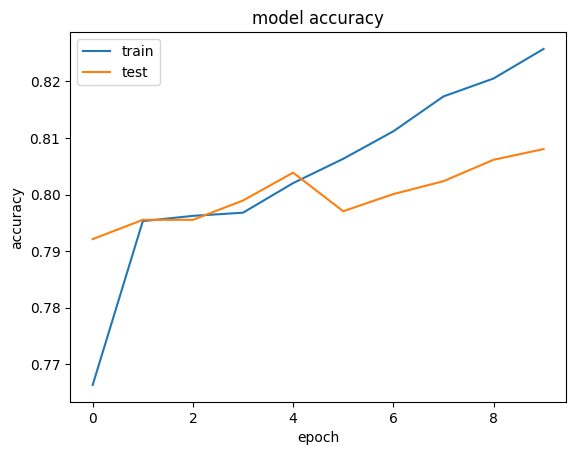

In [48]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Summarize `model_history.history` for `loss`

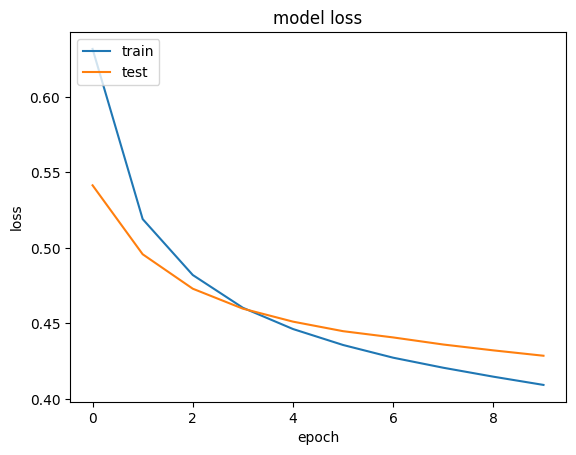

In [49]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Predicting the ANN Model

In [50]:
y_pred = ann_classifier.predict(X_test)
y_pred.shape

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


(2000, 1)

In [51]:
y_pred[0:5]

array([[0.29643354],
       [0.53127193],
       [0.2846533 ],
       [0.04901351],
       [0.18417118]], dtype=float32)

In [52]:
y_pred = (y_pred > 0.5)
y_pred.shape

(2000, 1)

## Confusion Matrix

In [53]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1530   65]
 [ 288  117]]


## Accuracy Score

In [54]:
ac = accuracy_score(y_test, y_pred)
print(ac)

0.8235


## ANN Summary

In [55]:
print( ann_classifier.summary() )

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 15)                  │             180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,382 (5.40 KB)

 Trainable params: 460 (1.80 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 922 (3.61 KB)

None
